In [1]:
# for manupilating data
import pandas  as pd 
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore
sns.set_style("darkgrid")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Remove Warning

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Take a look at the data

In [3]:
df = pd.read_csv('airline_passenger_satisfaction_train.csv') # this a data that i will train on it
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.shape

(103904, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
df.duplicated().any()

False

In [8]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
df.describe(include = "O")

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


# Ok After I used these functions I noticed many things :
>- Number of Rows is :  `103904` 
>
>                                                                                     
>- Number of columns is :  `25`
>
>
>- There are null values in column: `Arrival Delay in Minutes`
>
>
>- There is `"0"` complete duplicate
>
>
>- `Unnamed: 0` and `id` columns wouldn't be useful so i will drop this columns in cleaning's step
>
>
>- There are `1` column is float64 , `19` int64 and `5` object

## Explore and Visualize the Data to Gain Insights ( EDA )

In [10]:
# the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=18)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

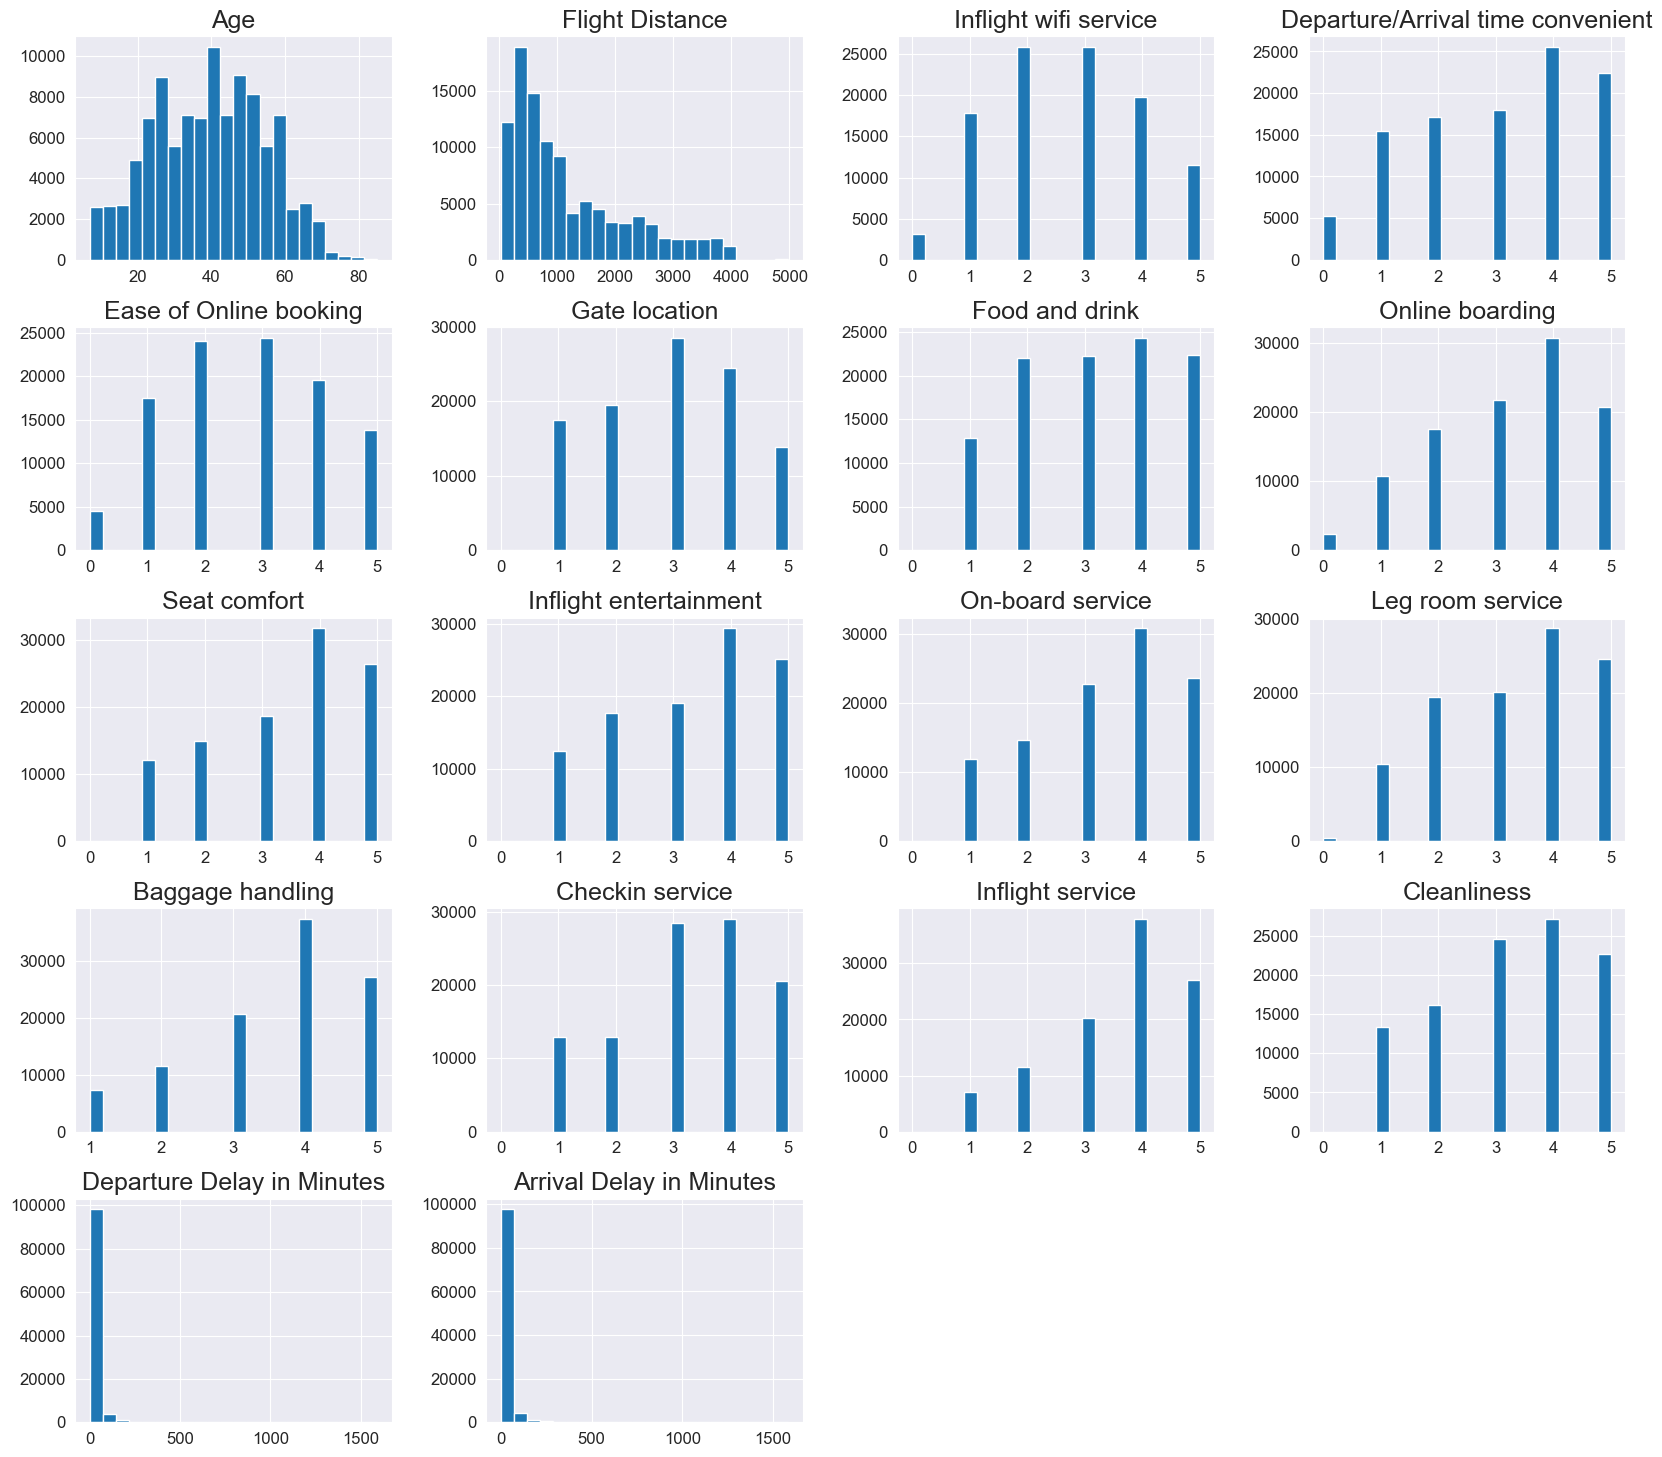

In [11]:
df.drop(['Unnamed: 0','id'],axis = 1).hist(bins=22, figsize=(20, 18), grid = True)
plt.show()

<div class= "alert alert-block alert-info">
    <b>   Note: From the previous Visualization, the most frequency in the levels of satisfaction is ( 4 ) for all except:                     [ Inflight wifi service , Ease of Online booking , Gate location ] is ( 3 )  </b>
</div>

looking at most frequency of satisfaction with all object columns

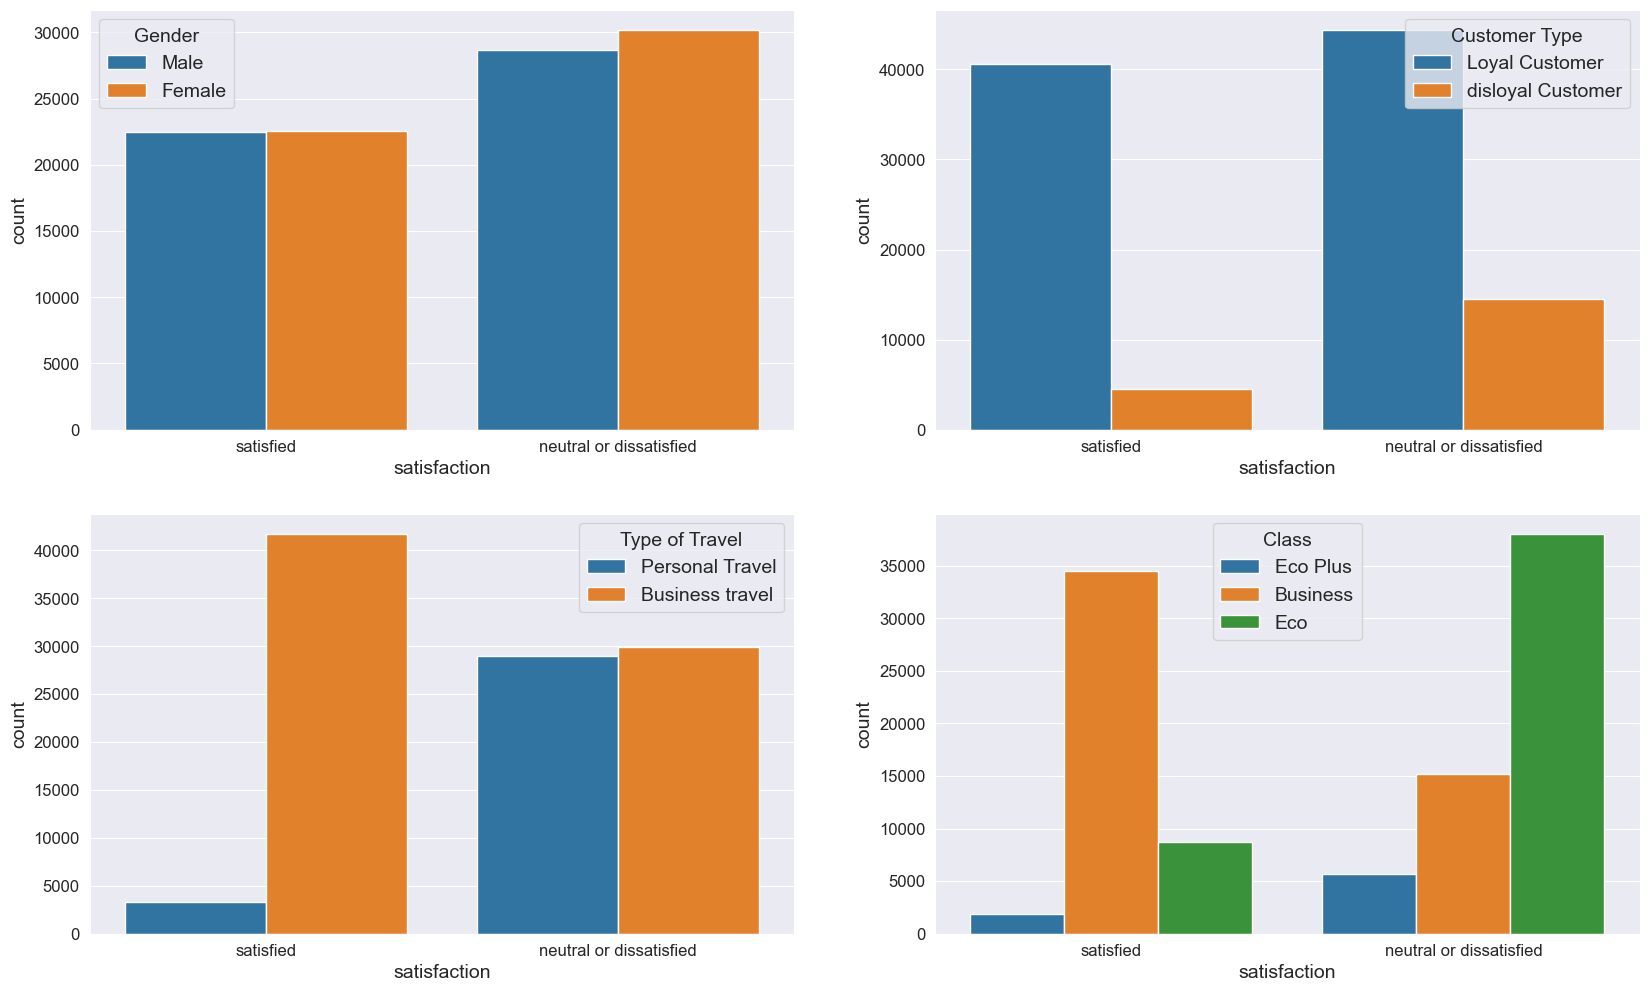

In [12]:
cols = df.drop('satisfaction' , axis = 1).select_dtypes(exclude=[np.number]).columns
fig, ax = plt.subplots(2, 2, figsize = (20, 12))
ax = ax.flatten()

for i, column in enumerate(cols):
    
    
    sns.countplot( data = df , x= 'satisfaction', hue = column , order = ['satisfied' ,'neutral or dissatisfied'] , ax = ax[i])
    
plt.show()

let's go see the age column with better form 

                                                    Most people is in range 40 year


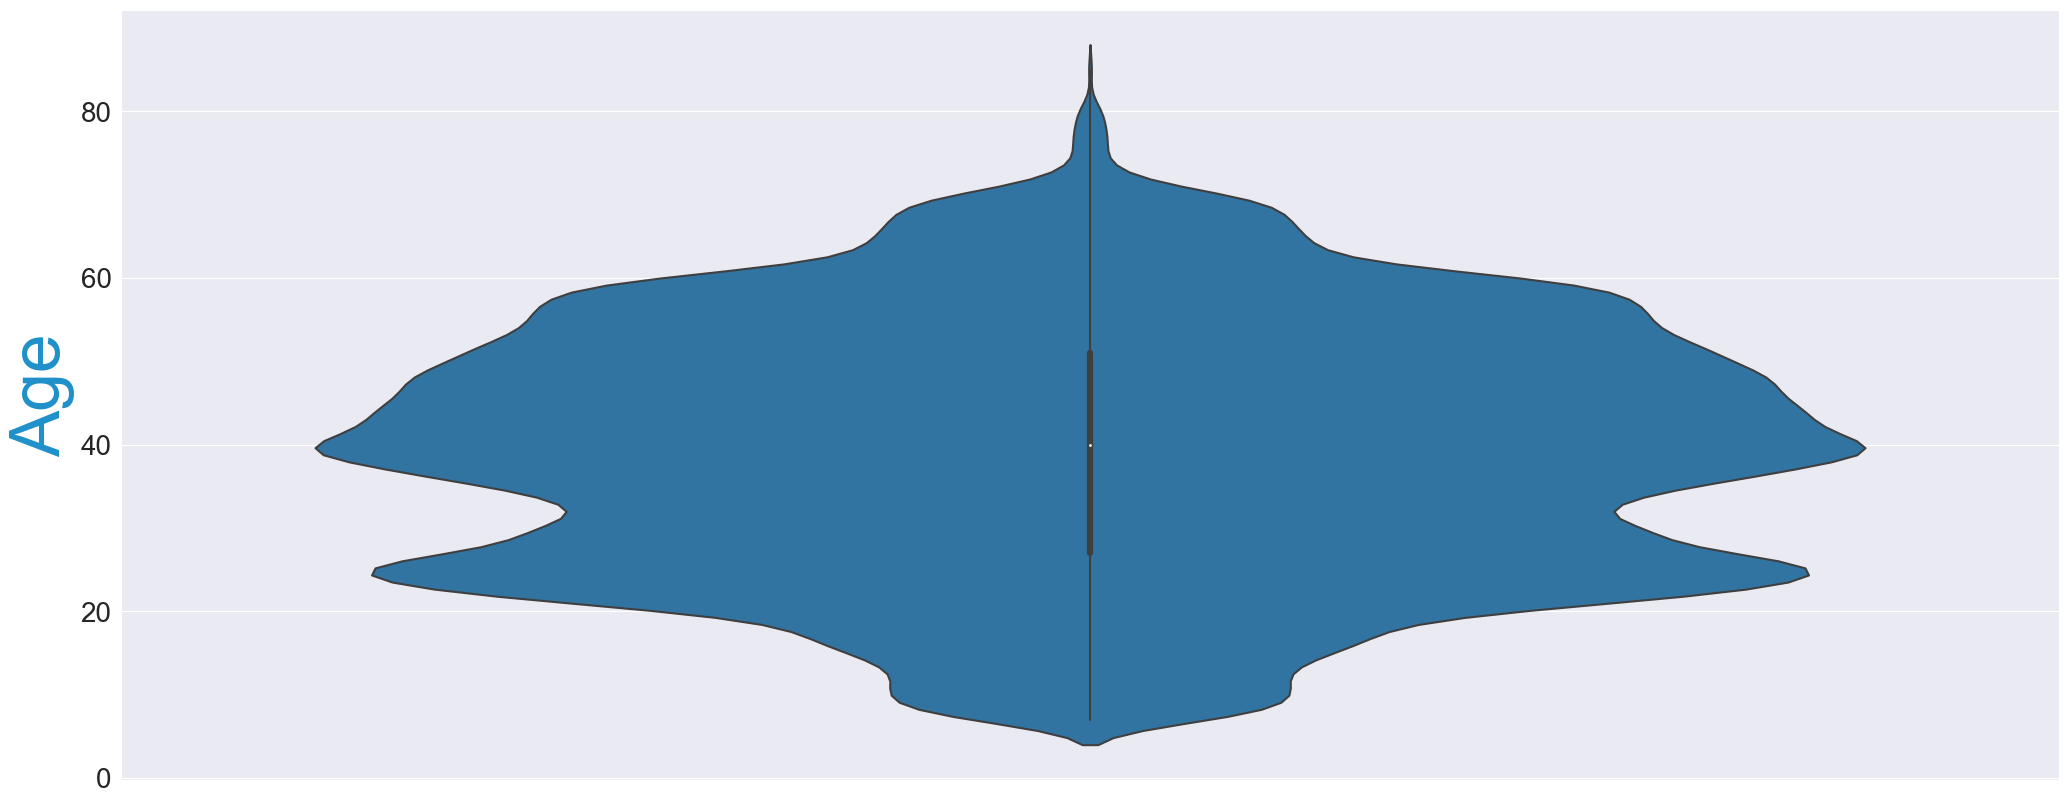

In [13]:
plt.figure(figsize = (25,10))

plt.rc('ytick', labelsize=20)
sns.violinplot(y = 'Age' , data = df)
plt.ylabel('Age' , size=50, color='#1e90c9')
print(Fore.BLUE + 52* ' ' + 'Most people is in range 40 year')
plt.show()

Ok, let's go plot the column of age with Satisfaction 

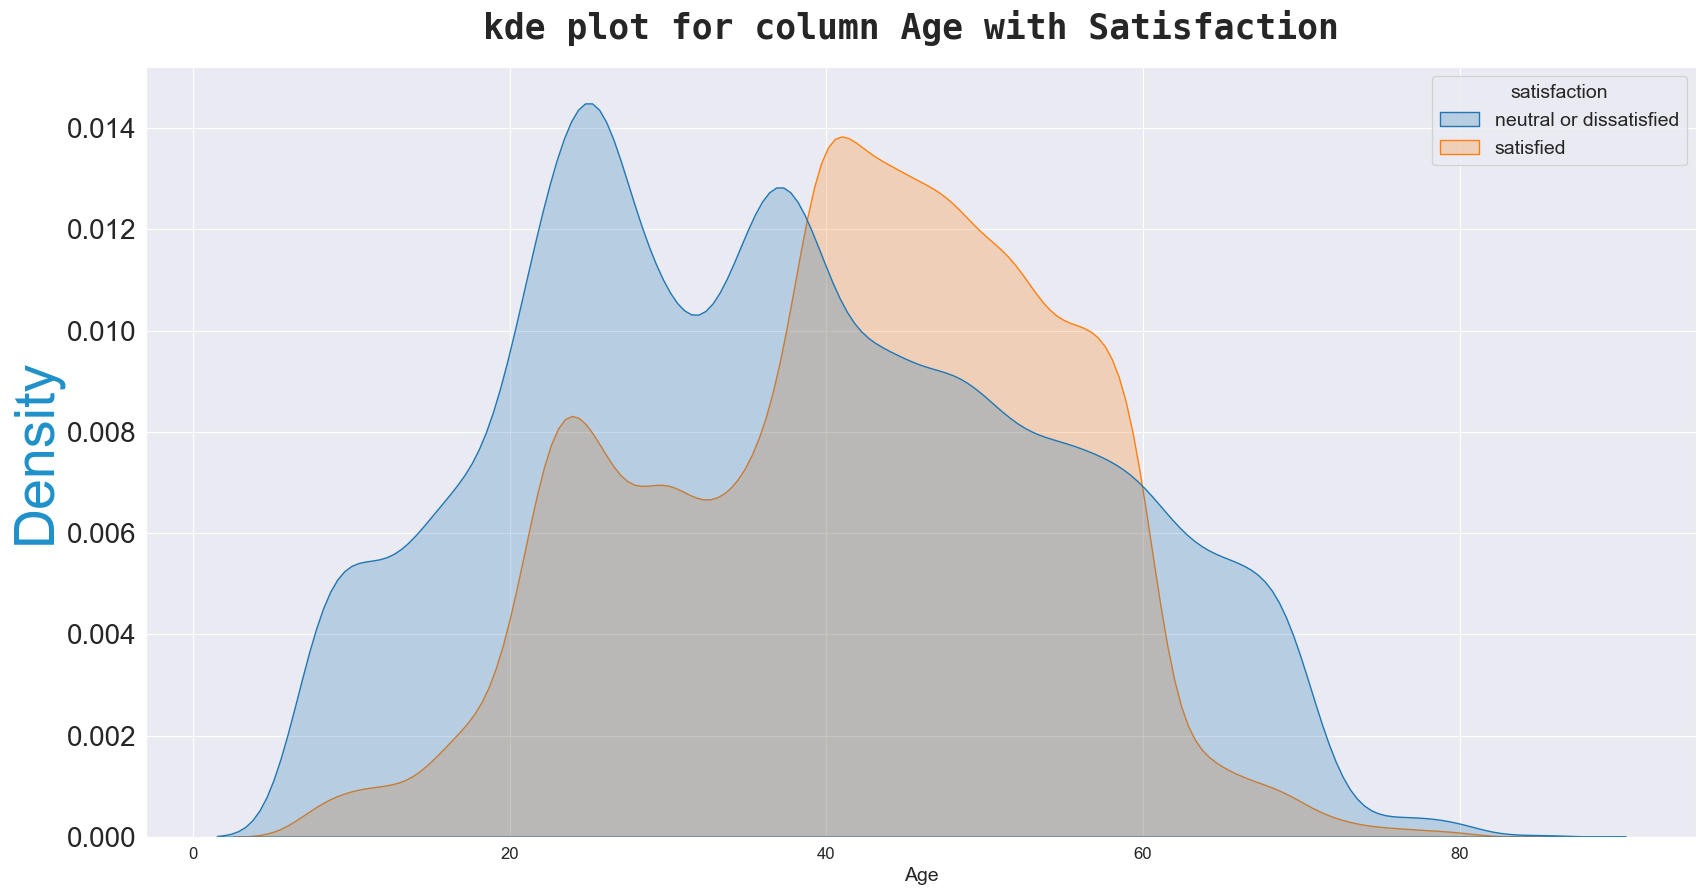

In [14]:
plt.figure(figsize = (20,10))

g = sns.kdeplot(data = df, x = 'Age', hue = 'satisfaction' , shade = True)

plt.rc('ytick', labelsize=20)
g.set_title("kde plot for column Age with Satisfaction ", size = 25, weight = "bold", fontname = "monospace", pad = 20)
plt.ylabel('Density' , size=40, color='#1e90c9')

plt.show()

<div class= "alert alert-block alert-info">
    <b>   Maybe we can see Satisfied people are in range [40-56] year & Unsatisfied are in range [20-40] year.   </b>
</div>

# <hr>

# Looking for Correlations

In [15]:
df_correlation = df.drop(['Unnamed: 0' , 'id'] , axis=1).select_dtypes(include=[np.number]).corr() # i drop this columns as i will droping it later
df_correlation

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029900
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030703


Note: It's hard to see correlation so I'll use heatmap

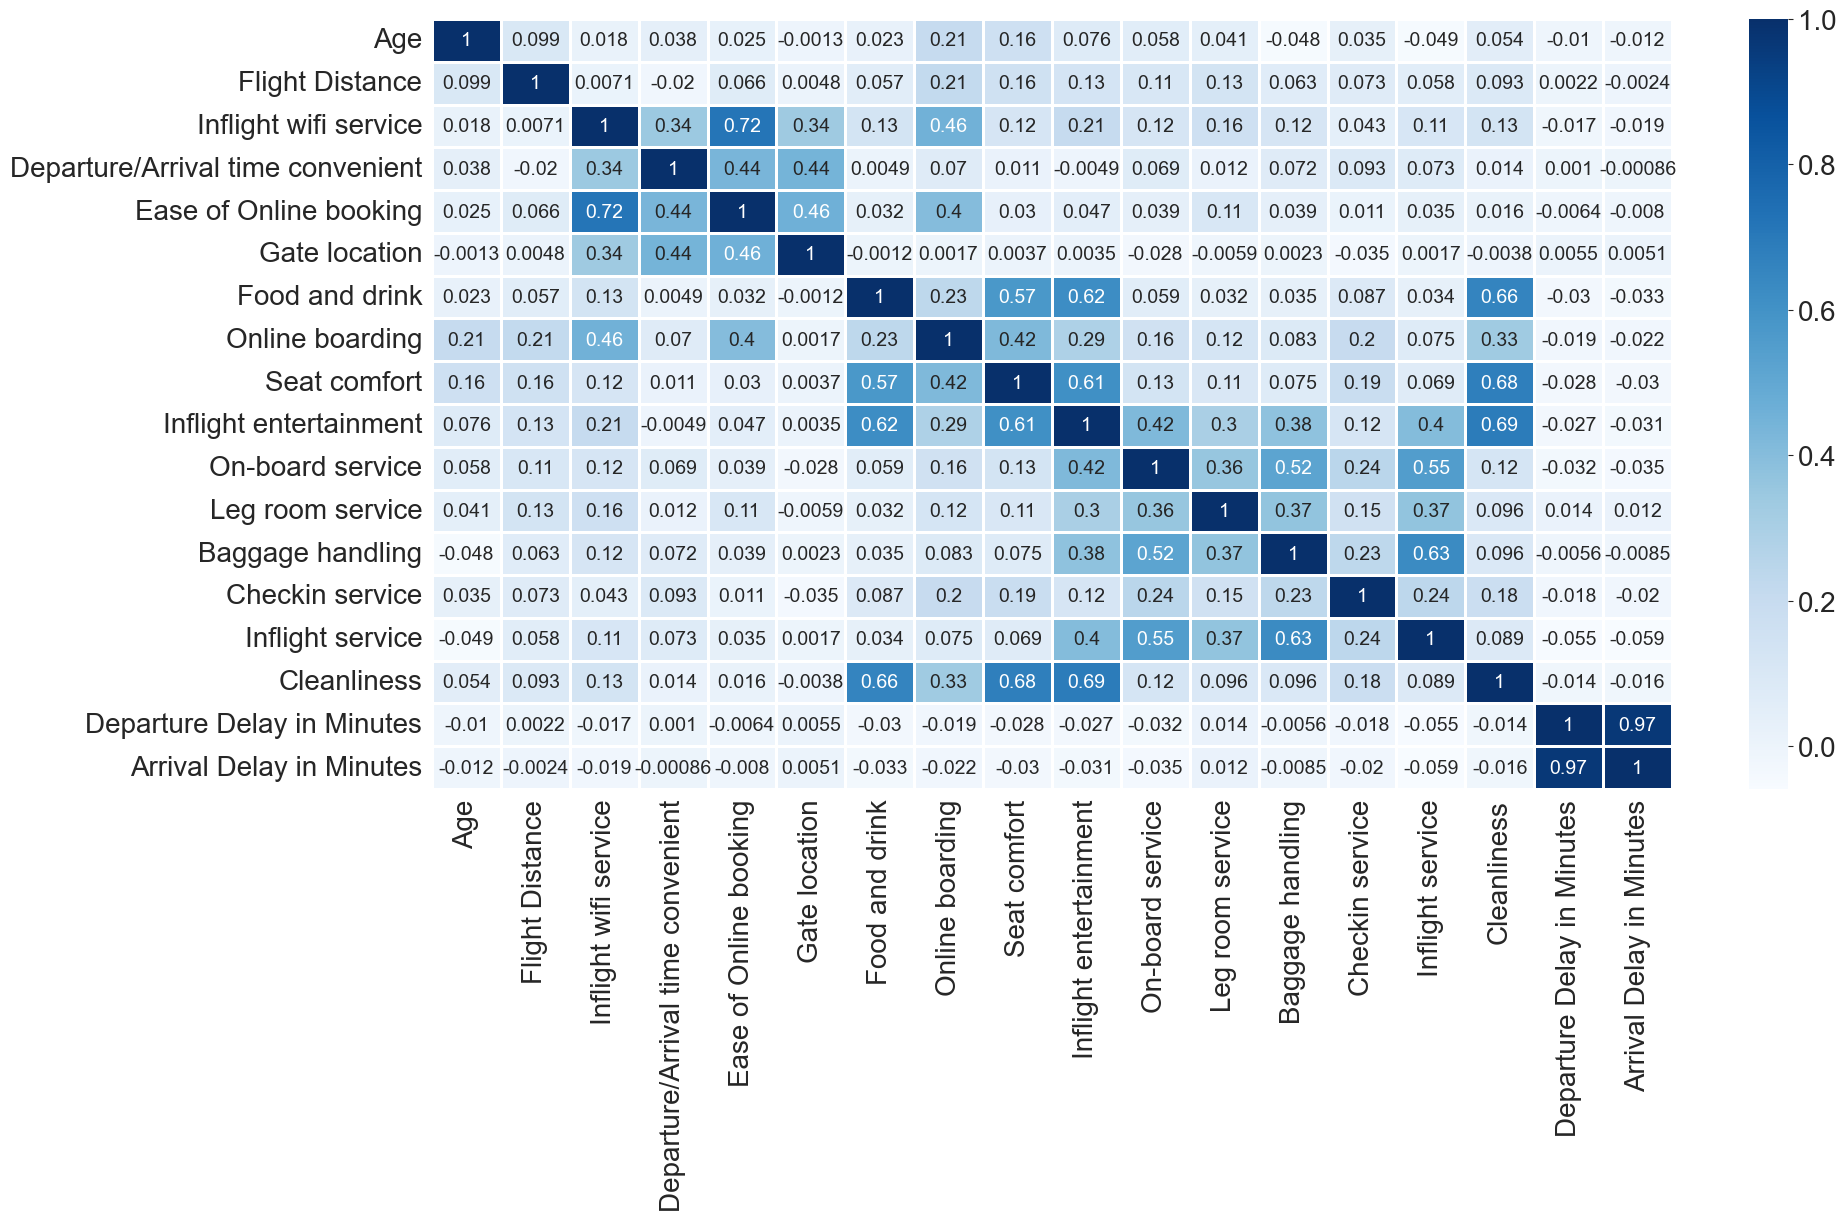

In [16]:
plt.figure(figsize = (20,10))
plt.rc('xtick', labelsize=20)

sns.heatmap(df_correlation, cmap='Blues' ,linewidths= 2 , linecolor = 'white' ,annot = True)
plt.show()

Ohh , there is a strng correlation between 'Departure Delay in Minutes' & 'Arrival Delay in Minutes'                              
let's go to see more about this 

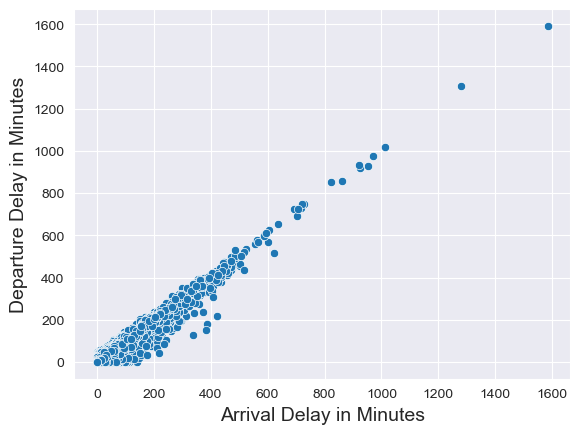

In [17]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

sns.scatterplot(x ='Arrival Delay in Minutes' , y = 'Departure Delay in Minutes' , data = df )
plt.show()

<div class= "alert alert-block alert-info">
       <b> Note(1): from this graph there are a strong correlation between: (Arrival Delay in Minutes)
                and (Departure Delay in Minutes) , We can also notice that Departure Delay is approximately equal to Arrival                     Delay. That tells us that the delay happens only before the start of the flight (not during the flight).

                I will dealing with strong correlation in feature engineering step  
</div> 

<div class= "alert alert-block alert-info">
    <b>   Note(2):  there are outliers i will deal with it in cleaning step  </b>
</div>


I will look into correlations with Satisfaction column

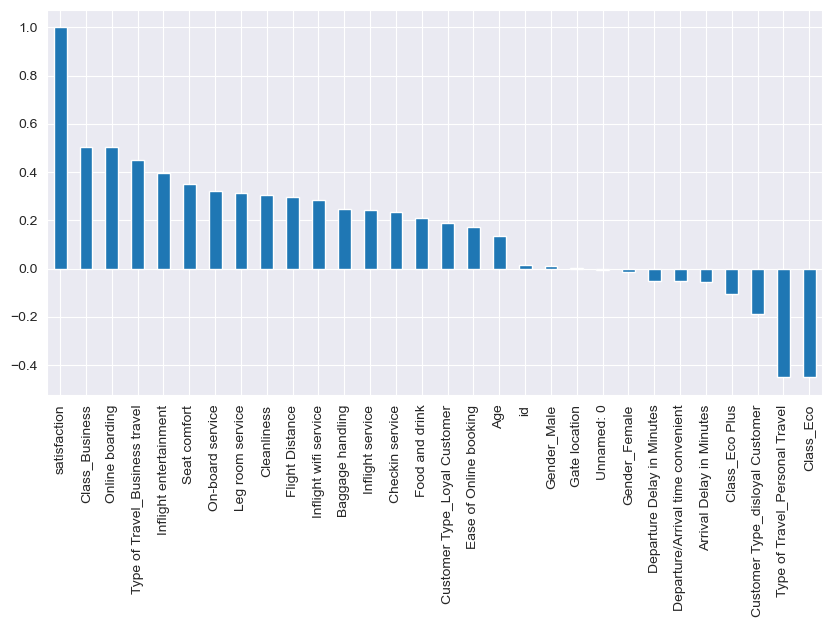

In [18]:
plt.figure(figsize = (10,5))

df["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace = True)
df_dummies = pd.get_dummies(df)
df_dummies.corr()['satisfaction'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

> ## Positively Correlated
> - Business Class ,online boarding and Business travels are strong reasons for people satisfaction.

> ## Negatively Correlated
> - Personal Travels and Economy Class results in Unsatisfaction.

<div class= "alert alert-block alert-info">
       <b> Note: i replace: "satisfied" to 1 and "neutral or dissatisfied" to 0 in "satisfaction" columns   </b>
</div> 

<h>

<hr>

# Data Cleaning

I will do this by Function

In [19]:
def cleaning (data):    # this function for all cleaning
    
    data.drop(['Unnamed: 0' , 'id' , 'Arrival Delay in Minutes' ] , axis = 1 , inplace = True)
    data["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace = True)
    return data


note i will call this function during testing

In [20]:
cleaning(df).head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1


 missing values , There are no missing values anymore as they were deleted when i deleted 'Arrival Delay in Minutes' column

 Test

In [21]:
assert df.isna().sum().all() == 0

# Outliers

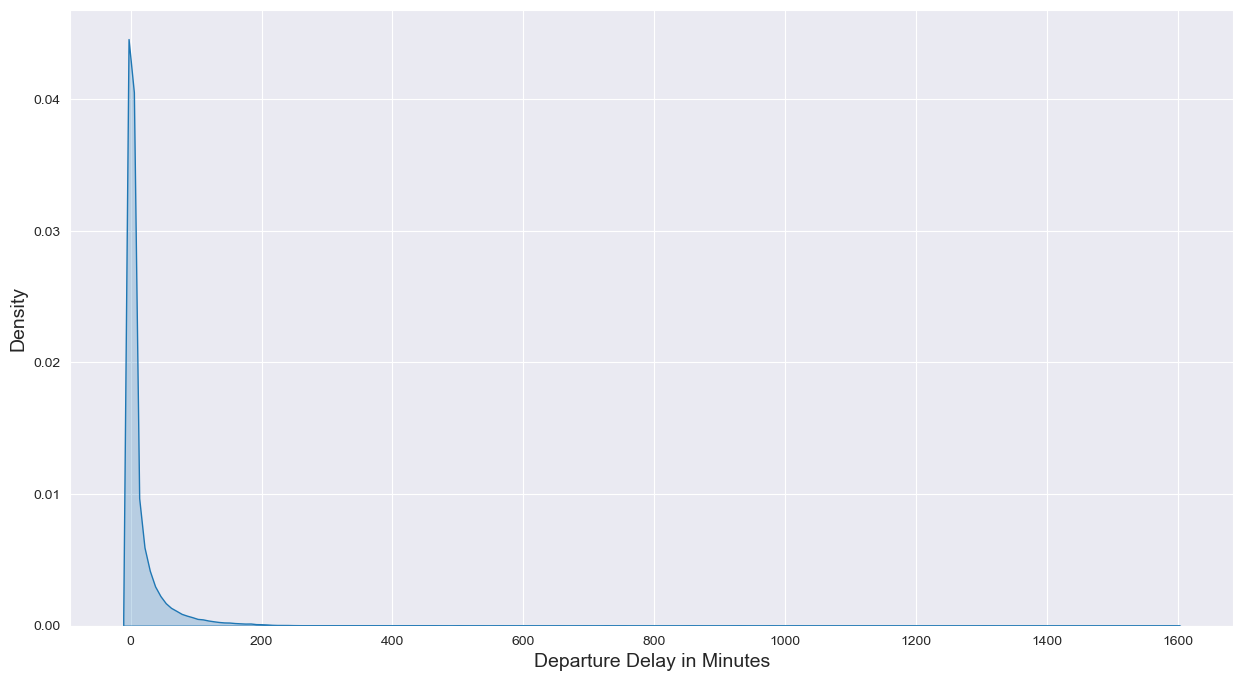

In [22]:
plt.figure(figsize = (15,8))
sns.kdeplot(data = df , x ='Departure Delay in Minutes' , shade = True)
plt.show()

In [23]:
np.array(dict(df['Departure Delay in Minutes'].value_counts().sort_index(ascending = False)))

array({1592: 1, 1305: 1, 1017: 1, 978: 1, 933: 1, 930: 1, 921: 1, 859: 1, 853: 1, 750: 1, 748: 1, 729: 1, 726: 1, 724: 1, 692: 1, 652: 1, 626: 1, 610: 1, 600: 1, 595: 1, 579: 1, 570: 1, 566: 1, 559: 1, 537: 1, 531: 1, 519: 1, 514: 1, 505: 1, 503: 2, 501: 1, 496: 1, 491: 1, 480: 2, 472: 1, 469: 1, 465: 1, 463: 1, 460: 1, 459: 1, 455: 1, 454: 4, 452: 2, 450: 1, 448: 1, 447: 1, 446: 1, 444: 1, 438: 1, 437: 2, 435: 1, 433: 1, 430: 1, 429: 1, 427: 1, 426: 1, 423: 3, 420: 1, 419: 1, 415: 1, 414: 2, 412: 1, 411: 1, 410: 2, 407: 1, 402: 1, 401: 2, 400: 2, 399: 1, 398: 2, 396: 1, 394: 4, 392: 1, 391: 1, 390: 1, 389: 2, 388: 1, 384: 1, 383: 2, 382: 1, 381: 2, 378: 1, 377: 1, 376: 1, 373: 1, 372: 1, 371: 3, 370: 1, 368: 3, 365: 2, 364: 1, 363: 1, 362: 2, 360: 2, 359: 1, 358: 4, 357: 1, 355: 3, 353: 2, 352: 1, 351: 3, 350: 2, 348: 3, 347: 1, 346: 1, 345: 1, 344: 1, 343: 1, 342: 3, 341: 1, 340: 3, 339: 1, 338: 4, 337: 1, 336: 2, 334: 3, 333: 3, 332: 1, 331: 2, 330: 5, 329: 1, 328: 4, 327: 3, 326: 4

<div class= "alert alert-block alert-info">
       <b> i will deal with this problem by ''StandardScaler'' in Feature Scaling   </b>
</div> 

<hr>

# Modeling

In [24]:
# tools
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score , cross_val_predict

# models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import (AdaBoostClassifier,
                              RandomForestClassifier,
                              ExtraTreesClassifier, 
                              GradientBoostingClassifier,
                              BaggingClassifier)

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix ,roc_curve ,roc_auc_score

In [25]:
x = df.drop("satisfaction", axis = 1)
y_train_full = df["satisfaction"]

Pipeline

In [26]:
x_num = x.select_dtypes(include=[np.number]).columns
x_cat = x.select_dtypes(exclude=[np.number]).columns

pipeline = ColumnTransformer([
 ("cat", OneHotEncoder(handle_unknown="ignore"), x_cat ),
 ("num", StandardScaler(), x_num)])

In [27]:
x_train_full = pipeline.fit_transform(x) 

test_data

In [28]:
x_test = pd.read_csv('airline_passenger_satisfaction_test.csv')
x_test.head(1)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied


In [29]:
x_test_full = pipeline.transform(cleaning(x_test))    # note: we should call cleaning function during this step

 looking the test data after we applyed pipeline

In [30]:
x__ = pd.DataFrame(x_test_full, columns= pipeline.get_feature_names_out(),
                            index=x_test.index)
x__.head()

,cat__Gender_Female,cat__Gender_Male,cat__Customer Type_Loyal Customer,cat__Customer Type_disloyal Customer,cat__Type of Travel_Business travel,cat__Type of Travel_Personal Travel,cat__Class_Business,cat__Class_Eco,cat__Class_Eco Plus,num__Age,num__Flight Distance,num__Inflight wifi service,num__Departure/Arrival time convenient,num__Ease of Online booking,num__Gate location,num__Food and drink,num__Online boarding,num__Seat comfort,num__Inflight entertainment,num__On-board service,num__Leg room service,num__Baggage handling,num__Checkin service,num__Inflight service,num__Cleanliness,num__Departure Delay in Minutes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.834958,-1.032398,1.709804,0.616172,0.173776,0.800803,-0.152031,0.555482,-0.333108,1.231704,1.255590,1.253380,1.158582,-1.030742,1.156436,1.305870,0.920317
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.223601,1.678348,-1.302646,-1.350954,0.173776,-1.547323,1.352264,0.555482,1.183099,0.481508,0.479403,0.493270,0.311769,-0.240472,0.305848,1.305870,-0.387532
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.282160,-1.000307,-0.549533,-2.006662,-0.541060,0.800803,-0.904178,-0.926545,-1.091211,-1.018885,0.479403,-1.787061,-0.535045,-1.030742,-1.395328,-0.980251,-0.387532
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.305678,2.193821,-2.055758,-2.006662,-1.970731,-0.764614,-0.152031,0.555482,0.424996,-1.769081,-1.849161,-1.787061,-2.228672,-0.240472,-2.245916,0.543829,-0.387532
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.636478,-0.007470,-0.549533,-0.039537,0.888612,0.018094,0.600117,-1.667559,-1.091211,-1.018885,-1.072973,-1.026951,-1.381858,0.549799,-1.395328,0.543829,-0.387532


In [31]:
y_test_full = x_test['satisfaction'] # note: i called cleaning_function above so the satisfaction's columns is ready

Split to Cross-Validation

In [32]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, 
                                                      test_size = 0.2, random_state = 42)

<hr> 

help functions

In [33]:
def accuracy_and_rmse(predict):
    
    print(Fore.BLUE + 'accuracy: ' + str( accuracy_score( predict , y_valid ) * 100 ) + " %")
    lin_rmse = mean_squared_error(y_valid, predict,
                              squared=False)
    print(Fore.BLUE + '\nrmse: ' + str(lin_rmse))     # rmse

In [34]:
def precision_recall_f1(predict):
    
    print('precision: '+ str(precision_score(y_valid , predict)))
    print('recall:    '+ str(recall_score(y_valid , predict)))
    print('F1_score:  '+ str(f1_score(y_valid , predict)))

In [35]:
def plot_roc_curve(fpr, tpr, label = None):
    
    plt.plot(fpr, tpr, linewidth = 2, label= 'auc= '+ str(label))
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate", fontname = "monospace", fontsize = 15, weight = "semibold")
    plt.ylabel("True Positive Rate(Recall)", fontname = "monospace", fontsize = 15, weight = "semibold")
    plt.title("ROC Curve", fontname = "monospace", fontsize = 17, weight = "bold")
    plt.axis([0, 1, 0, 1])
    plt.legend(loc=4)
    plt.show()

# Models

In [36]:
import time

model_name= []
accuracy = []
roc_auc = []
F1_score = []
training_time = []

models = [
    
    LogisticRegression(random_state = 42),
    SGDClassifier(random_state = 42),
    SVC(random_state = 42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state = 42),
    
           # ensamble models
    
    # Bagging
    BaggingClassifier(random_state = 42),
    RandomForestClassifier(random_state = 42),
    ExtraTreesClassifier(random_state = 42),
    # Boosting
    AdaBoostClassifier(random_state = 42),
    GradientBoostingClassifier(random_state = 42),
    XGBClassifier(random_state = 42)
]

for model in models :
    
    start_time = time.time()
    model.fit(x_train , y_train)
    fitting_time = time.time() - start_time
    
    prediction = model.predict(x_valid)
    model_name.append(model.__class__.__name__)
    accuracy.append(str( accuracy_score( prediction , y_valid ) * 100 ) + " %")
    roc_auc.append(str(roc_auc_score(y_valid , prediction)*100) + ' %')
    F1_score.append(str(f1_score(y_valid , prediction)* 100) + '%')
    training_time.append(fitting_time) 


## look at the accuracy, auc, f1-score and training-time for all algorathim

In [37]:
models_df = pd.DataFrame({"model-name":model_name, "accuracy": accuracy ,'auc':roc_auc ,'F1-Score':F1_score , 'training-time':training_time })
models_df = models_df.set_index('model-name')
models_df.sort_values("auc", ascending = False)

,accuracy,auc,F1-Score,training-time
model-name,,,,
RandomForestClassifier,96.33318897069438 %,96.07109630261257 %,95.72198517853133%,10.481497
XGBClassifier,96.18401424378038 %,95.95121604334153 %,95.56065610479762%,0.476725
ExtraTreesClassifier,96.15995380395553 %,95.89002795539595 %,95.51786115479666%,8.856324
BaggingClassifier,96.02521534093643 %,95.74186456401338 %,95.35589789722253%,3.631285
SVC,95.31783841008613 %,95.0857185891765 %,94.56029518644826%,128.804581
DecisionTreeClassifier,94.74519994225494 %,94.67361130908766 %,93.98678414096918%,0.600394
GradientBoostingClassifier,94.05225927529955 %,93.78871565873878 %,93.08337996642418%,15.468660
AdaBoostClassifier,92.84442519609259 %,92.63258749708275 %,91.73199888796219%,4.301353
KNeighborsClassifier,92.92141860353208 %,92.44439011152295 %,91.62157543999545%,0.006981


<div class= "alert alert-block alert-info">
             <b> Note: The best model is "RandomForest" </b>
</div> 

let's go to exploration more and fine-tuning for "RandomForest"

# Fine-Tuning

Step 1: Find the best number of trees (n_estimators)

In [38]:
param_grid = {'n_estimators': [10, 50, 100, 200 , 500]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train_full, y_train_full)
best_n_estimators = grid_search.best_params_['n_estimators']

Step 2: Find the best maximum depth of trees (max_depth) 

In [39]:
param_grid = {'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=best_n_estimators), param_grid, cv=5)
grid_search.fit(x_train_full, y_train_full)
best_max_depth = grid_search.best_params_['max_depth']

Step 3: Find the best minimum samples split and leaf

In [40]:
param_grid = {'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth), param_grid, cv=5)
grid_search.fit(x_train_full, y_train_full)
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']

Step 4: Find the best maximum features

In [41]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2', None]}
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf), param_grid, cv=5)
grid_search.fit(x_train_full, y_train_full)
best_max_features = grid_search.best_params_['max_features']

C:\Users\BoDa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\BoDa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\BoDa\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\BoDa\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\BoDa\anaconda3\Lib\site-packages\sklearn

Step 5: Build the final model with the best hyperparameters

In [43]:
final_rf_model = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    max_features=best_max_features,
    random_state=42)

In [45]:
start_time = time.time()
final_rf_model.fit(x_train_full, y_train_full)
fitting_time = time.time() - start_time
print(Fore.BLUE + f'fitting-time= {fitting_time}')


fitting-time= 68.64198875427246


# <h2 style = "color: #35454F">Evaluating the model by test data</h2>

In [46]:
y_pred = final_rf_model.predict(x_test_full)

print(Fore.BLUE + '\nfinal_accuracy: ' + str( accuracy_score( y_pred , y_test_full ) * 100 ) + " %\n")
f_rmse = mean_squared_error( y_test_full, y_pred,
                              squared=False)
print( Fore.BLUE + 'rmse: ' + str( f_rmse ))


final_accuracy: 96.40822297505389 %

rmse: 0.18951984130813598


We can compute a 95% confidence interval for the test RMSE:

In [47]:
from scipy import stats

confidence = 0.95
squared_errors = (y_pred - y_test_full) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.18345211, 0.19539924])

In [48]:
confusion_matrix(y_test_full , y_pred )

array([[14281,   292],
       [  641, 10762]], dtype=int64)

In [49]:
print('precision: '+ str(precision_score(y_test_full , y_pred)))
print('recall:    '+ str(recall_score(y_test_full , y_pred)))
print('F1_score:  '+ str(f1_score(y_test_full , y_pred)))

precision: 0.9735842229057354
recall:    0.9437867227922476
F1_score:  0.9584539341853319


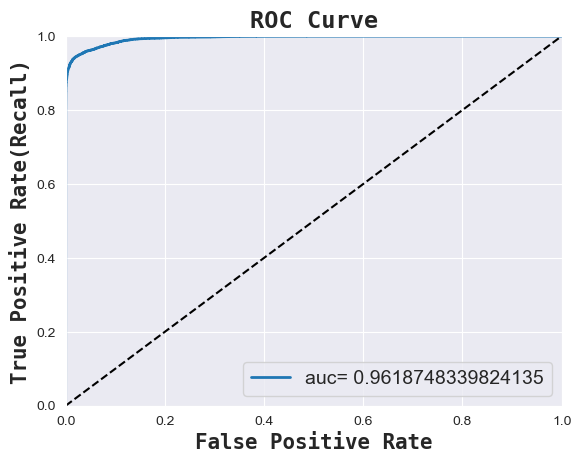

In [50]:
rf_fpr, rf_tpr, thresholds = roc_curve(y_test_full, final_rf_model.predict_proba(x_test_full)[:,1])
plot_roc_curve(rf_fpr , rf_tpr, roc_auc_score(y_test_full , y_pred))

# <hr>

## full_pipeline

In [51]:
full_pipeline = Pipeline([
    ("preprocessing", pipeline),
    ("random_forest", final_rf_model),
])
full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes'],
      dtype='object'))])),
                ('random_forest',
                 RandomForestClassifier(max_depth=30, min_samples_split=5,
                                        n_estimators=500, random_state=42))])

# The End

<hr>